# Simulation of the QUADRUPOLE FIELD

## Theory
Reproduced from Masek, K., & Sherwood, T. (1995). Electrostatic quadrupoles [White paper]. CERN.

### Potential

$\begin{equation}
\mathbf{\Phi} = \frac{V_{quad}}{a^2}  (x^2 - y^2)
\end{equation}$,
where $V_{quad}$ is the d.c. voltage at the poles and $a$ is the distance of the pole pieces from the central axis. x,y are the coordinates in the plane perpendicular to the optical axis z. 

$\mathbf{\Phi}$ is the solution of the Laplace equation with boundary
conditions: 
$\begin{align}
\mathrm{for \ }& x = a, \ y = 0 \Rightarrow \mathbf{\Phi} = \frac{V}{2} \mathrm{\ and} \\
\mathrm{for \ }& x = 0, \ y = a \Rightarrow \mathbf{\Phi} = -\frac{V}{2}
\end{align}$

This represents electrostatic quadrupole field corresponding to the fixed geometry of the electrodes with an alternating potential.


We omit the exact potential and dimensions of the quadrupole, as we don't know real values, and combine them into an arbitrary "gradient" factor $G$, which results in

$\begin{equation} \mathbf{\Phi} = G(x^2 - y^2)\end{equation}$


### Electric Field
$\begin{align}
\mathbf{E}(x,y) &= -\nabla \mathbf{\Phi}(x,y) \\
\mathbf{E}(x,y) &= - 2Gx + 2Gy
\end{align}$

from this, one can see the two terms for the pure quadrupole field easily:

$\begin{align}
\mathbf{E}_x &= -2Gx\\
\mathbf{E}_y &= +2Gy
\end{align}$


### Trajectory through the quadrupole
In order to calculate the trajectory through the quadrupole, we calculate now in the xz direction.
With the first order approximation of the equation of motion in an electrical field, this yields: 

$\begin{align}
m\frac{d^2x}{dt^2} &= -eGx
\end{align}$


if $G > 0$, the solution is:

$\begin{align}
x &= A \sqrt{\cos \left( \frac{eG}{m}\right)}t + B\sqrt{\sin \left( \frac{eG}{m}\right) }t
\end{align}$

A, B can be determined by the initial conditions: $x(t=0) = x_0, \frac{dx}{dt}(t=0) = \dot{x_0}$

for simplification, we set now:

$\begin{align}
\frac{dx}{dt} &= \frac{dx}{dz}\frac{dz}{dt} = x'\dot{z}=x'v
\end{align}$

and obtain for the x-coordinate

$\begin{align}
&x = x_0 \cos (Kz) + \frac{x'_0}{K} \sin (Kz)\\
&x' = -K x_0 \sin (Kz) + x'_0 \cos (Kz) \\
&\text{where } K = \sqrt{\frac{eG}{mv^2}}
\end{align}$

### Final quadrupole model in vectorized form
Consequently, in the quadrupole model, the calculations are carried out in matrix notation:

$\begin{align}
\left(\begin{array}{c} x \\ x' \end{array}\right) &= \mathbf{T} \left(\begin{array}{c}
x_0 \\
x'_0
\end{array}\right),\\
\text{where }\mathbf{T}_{G>0} &= \left(\begin{array}{cc}
\cos(Kz) & \frac{1}{K}\sin(Kz) \\
-\,K\,\sin(Kz) & \cos(Kz)
\end{array}\right) \\
\text{or }\mathbf{T}_{G<0} &= \left(\begin{array}{cc}
\cosh(Kz) & \frac{1}{K}\sinh(Kz) \\
K\,\sinh(Kz) & \cosh(Kz)
\end{array}\right)
\end{align}$

For $G>0$ the beam is defocused in the yz plane, and vice versa. Hence, in the yz-trajectory, the matrices are exchanged.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1) Define beam and quadrupole parameters

N = 10000000    # number of simulated atoms
L = 0.1        # total quadrupole length (m)
K = 10         # quadrupole "strength" parameter (1/m)

# For a typical electrostatic quadrupole, K^2 = e*G / (m v^2).
# The sign of G>0 => focusing in x, defocusing in y.

# initial beam sizes (Gaussian in x,y, with optional small angles)
sigma_x  = 250.0e-9  # RMS beam size in x [m]
sigma_y  = 250.0e-9  # RMS beam size in y [m]
sigma_xp = 50.0e-8    # RMS slope x' (in rad)
sigma_yp = 50.0e-8    # RMS slope y' (in rad)




In [3]:
# 2) Generate the initial beam distribution in vector form: (x, x', y, y')\
#     beam[0,:] = x positions\
#     beam[1,:] = x' slopes\
#     beam[2,:] = y positions\
#     beam[3,:] = y' slopes

x_init  = np.random.normal(loc=0.0, scale=sigma_x,  size=N)
xp_init = np.random.normal(loc=0.0, scale=sigma_xp, size=N)
y_init  = np.random.normal(loc=0.0, scale=sigma_y,  size=N)
yp_init = np.random.normal(loc=0.0, scale=sigma_yp, size=N)

beam_init = np.vstack((x_init, xp_init, y_init, yp_init))

In [4]:
#3) Generate the transformation matrices for the trajectory in the xz and yz planes as well as a combined 4x4 matrix

def T_xz(z, K):
    """
    2x2 transfer matrix in the xz-plane for length z with focusing strength K.
    """
    if K >= 0:
        c = np.cos(K * z)
        s = np.sin(K * z)
        return np.array([
            [      c,      s/K ],
            [ -K * s,       c  ]
        ])
    else:
        c = np.cosh(K * z)
        s = np.sinh(K * z)
        return np.array([
            [      c,      s/K ],
            [ K * s,       c  ]
        ])

def T_yz(z, K):
    """
    2x2 transfer matrix in the xz-plane for length z with focusing strength K.
    """
    if K >= 0:
        c = np.cosh(K * z)
        s = np.sinh(K * z)
        return np.array([
            [      c,      s/K ],
            [ K * s,       c  ]
        ])
    else:
        c = np.cos(K * z)
        s = np.sin(K * z)
        return np.array([
            [      c,      s/K ],
            [ -K * s,       c  ]
        ])
    
def quad_matrix_4x4(z, K):
    """
    Full 4x4 matrix
    [ T_xz, 0]
    [0 , T_xz]
    """
    M4 = np.zeros((4,4))
    M4[0:2, 0:2] = T_xz(z, K)
    M4[2:4, 2:4] = T_yz(z, K)
    return M4

In [5]:
#4) Application of the transformation matrix to our gaussian beam

def calculate_beam_profile(beam_init,L, K):
    """
    Calculate the beam profile at different positions along the optical axis.

    Parameters:
    beam_init : numpy.ndarray
        The initial beam state represented as a 4x1 vector.
    K : float
        The focusing strength, which influences the transformation matrices.

    Returns:
    tuple of numpy.ndarray
        The beam profiles at the initial position (before), at the midpoint (mid), 
        and at the final position (after) along the optical axis.
    """

    M_before = np.identity(4)
    M_half = quad_matrix_4x4(L/2, K)
    M_full = quad_matrix_4x4(L, K)  # i.e. 4x4 matrix for length L

    # "before" is at z=0, so that's just beam_init
    beam_before =  M_before @ beam_init

    # "within" (middle) at z=L/2 => apply M_half
    beam_mid = M_half @ beam_init

    # "after" at z=L => apply M_full
    beam_after = M_full @ beam_init

    return beam_before, beam_mid, beam_after

In [6]:
#5) Define the plotting function for multiple beam profiles

def plot_beam_profile(beam_after, beam_before=None, beam_mid=None, range_2d=None):
    """
    Plot the beam profile at different positions along the optical axis.

    Parameters:
    beam_after : numpy.ndarray
        The beam state after propagating through the optical system.
    beam_before : numpy.ndarray, optional
        The beam state before propagating through the optical system.
    beam_mid : numpy.ndarray, optional
        The beam state at the midpoint of propagation.
    range_2d : list of lists, optional
        The range for the 2D histogram plot, specified as [[x_min, x_max], [y_min, y_max]].

    This function visualizes the beam profiles at different positions (before, mid, and after)
    along the optical axis using 2D histograms. If the mid beam profile is not provided, 
    it will only plot the before and after profiles. The function automatically determines 
    the range for the plots based on the provided beam data if not specified.
    """
    figsize = 3
    if range_2d is None:
        # Collect all beam data to find the global range
        all_x = []
        all_y = []

        if beam_before is not None:
            all_x.append(beam_before[0, :] * 1e9)
            all_y.append(beam_before[2, :] * 1e9)
        if beam_mid is not None:
            all_x.append(beam_mid[0, :] * 1e9)
            all_y.append(beam_mid[2, :] * 1e9)

        all_x.append(beam_after[0, :] * 1e9)
        all_y.append(beam_after[2, :] * 1e9)

        # Concatenate to find overall min and max
        x_data = np.concatenate(all_x)
        y_data = np.concatenate(all_y)
        x_min, x_max = x_data.min(), x_data.max()
        y_min, y_max = y_data.min(), y_data.max()
        range_2d = [[x_min, x_max], [y_min, y_max]]

    # Determine which axes is "after_axes" in the layout
    if beam_mid is None and beam_before is None:
        # Only one plot        
        fig, axs = plt.subplots(figsize=(figsize,figsize))
        after_axes = 0
        axs = [axs]  # so we can index consistently
    else:
        if beam_mid is None:
            # We have a 'before' and an 'after' only
            fig, axs = plt.subplots(1, 2, figsize=(figsize*2, figsize))
            after_axes = 1
        else:            
            # We have 'before', 'mid', and 'after'
            fig, axs = plt.subplots(1, 3, figsize=(figsize*3, figsize))
            after_axes = 2
            # Plot the beam at z = L/2
            x_mid = beam_mid[0, :] * 1e6
            y_mid = beam_mid[2, :] * 1e6
            axs[1].hist2d(x_mid, y_mid, bins=500, range=range_2d, cmap='plasma')
            #axs[1].set_title("Beam Profile WITHIN Quadrupole (z = L/2)")
            axs[1].set_xlabel("x [nm]")
            axs[1].set_ylabel("y [nm]")
            axs[1].set_aspect('equal', 'box')
            axs[1].set_xticks(np.linspace(range_2d[0][0], range_2d[0][1], 5))
            axs[1].set_yticks(np.linspace(range_2d[1][0], range_2d[1][1], 5))

        # Plot the beam at z = 0
        if beam_before is not None:
            x_before = beam_before[0, :] * 1e6
            y_before = beam_before[2, :] * 1e6
            axs[0].hist2d(x_before, y_before, bins=500, range=range_2d, cmap='plasma')
            #axs[0].set_title("Beam Profile BEFORE Quadrupole")
            axs[0].set_xlabel("x [μm]")
            axs[0].set_ylabel("y [μm]")
            axs[0].set_aspect('equal', 'box')
            axs[0].set_xticks(np.linspace(range_2d[0][0], range_2d[0][1], 5))
            axs[0].set_yticks(np.linspace(range_2d[1][0], range_2d[1][1], 5))

    # Plot the beam at z = L
    x_after = beam_after[0, :] * 1e6
    y_after = beam_after[2, :] * 1e6
    axs[after_axes].hist2d(x_after, y_after, bins=500, range=range_2d, cmap='plasma')
    #axs[after_axes].set_title("Beam Profile AFTER Quadrupole")
    axs[after_axes].set_xlabel("x [μm]")
    axs[after_axes].set_ylabel("y [μm]")
    axs[after_axes].set_aspect('equal', 'box')
    axs[after_axes].set_xticks(np.linspace(range_2d[0][0], range_2d[0][1], 5))
    axs[after_axes].set_yticks(np.linspace(range_2d[1][0], range_2d[1][1], 5))

    return fig, axs


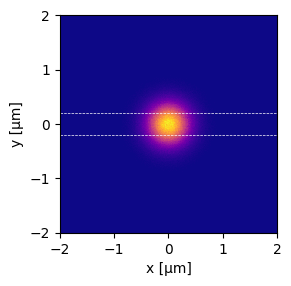

In [7]:
#6) Apply the model to the beam and plot it 
K = 0.001
L = 0.1

# Calculate the beam profile before and after passing through the quadrupole with a strength of -13
beam_before, beam_mid, beam_after = calculate_beam_profile(beam_init, L=L, K=K)

# Plot the beam profiles
#fig, axs = plot_beam_profile(beam_after, beam_before, range_2d=[[-1000, 1000], [-1000, 1000]])
fig, axs = plot_beam_profile(beam_after, range_2d=[[-2, 2], [-2, 2]])
axs[0].axhline(y=0.2, color='white', linestyle='--',linewidth=0.5)
axs[0].axhline(y=-0.2, color='white', linestyle='--',linewidth=0.5)
plt.tight_layout()
plt.show()

fig.savefig(f"beamshaping_sim_K_{K}_L_{L}_beam_{sigma_x}_N_{N}.png", dpi=600)


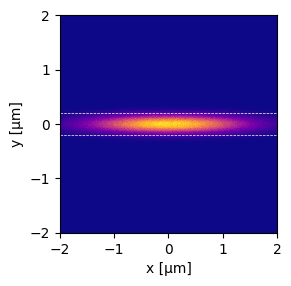

In [8]:
#6) Apply the model to the beam and plot it 
K = -20
L = 0.1

# Calculate the beam profile before and after passing through the quadrupole with a strength of -13
beam_before, beam_mid, beam_after = calculate_beam_profile(beam_init, L=L, K=K)

# Plot the beam profiles
#fig, axs = plot_beam_profile(beam_after, beam_before, range_2d=[[-1000, 1000], [-1000, 1000]])
fig, axs = plot_beam_profile(beam_after, range_2d=[[-2, 2], [-2, 2]])
axs[0].axhline(y=0.2, color='white', linestyle='--',linewidth=0.5)
axs[0].axhline(y=-0.2, color='white', linestyle='--',linewidth=0.5)

plt.tight_layout()
plt.show()
    
fig.savefig(f"beamshaping_sim_K_{K}_L_{L}_beam_{sigma_x}_N_{N}.png", dpi=600)



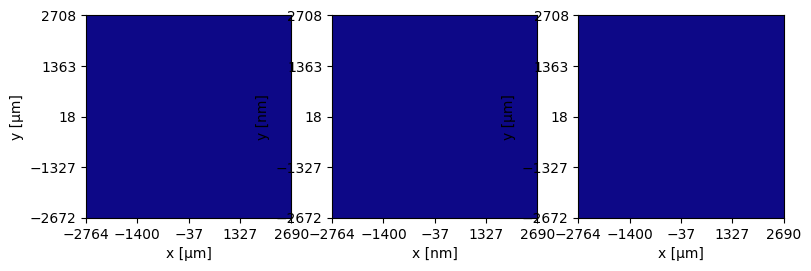

In [9]:
# Define the magnitude of the quadrupole strength and the desired angle of rotation of the beam profile
K_mag = 10
alpha = 45 + 1e-3  # Angle in degrees, valid range [0°, 45°]

# Define the rotation angle between the two quadrupoles
theta = np.radians(45)

# Calculate the quadrupole strengths for the two configurations
K1 = K_mag * np.sin(np.deg2rad(2*alpha))  # K1 for the first quadrupole at 0° rotation
K2 = -K_mag * np.cos(np.deg2rad(2*alpha))  # K2 for the second quadrupole at 45° rotation relative to the first one

# Calculate the beam profile for the first quadrupole
beam_before, beam_mid, beam_after = calculate_beam_profile(beam_init, L=0.1, K=K1)

# Create a rotation matrix for rotating the beam profile
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                             [np.sin(theta), np.cos(theta)]])

# Rotate x and y before passing through the next quadrupole
beam = rotation_matrix @ np.array([beam_after[0, :], beam_after[2, :]])
beam_after[0, :] = beam[0, :] 
beam_after[2, :] = beam[1, :] 

# Rotate x' and y' before passing through the next quadrupole
beam = rotation_matrix @ np.array([beam_after[1, :], beam_after[3, :]])
beam_after[1, :] = beam[0, :]
beam_after[3, :] = beam[1, :]

# Calculate the beam profile after the second quadrupole
beam_before2, beam_mid2, beam_after2 = calculate_beam_profile(beam_after, L=0.1, K=K2)

# Plot the beam profiles for comparison
fig, axs = plot_beam_profile(beam_after2, beam_before, beam_after)
